In [1]:
import socket
def get_var_by_comp_name(variableName):
    curCompName = socket.gethostname()
    retVal = None
    if variableName == 'khs_dir':
        if curCompName == 'doga-MSISSD':
            base_dir = '/mnt/USB_HDD_1TB/GitHub/keyhandshapediscovery'  # for bogazici kasa
        elif curCompName == 'WsUbuntu05' or curCompName == 'wsubuntu':
            base_dir = '/home/wsubuntu/GitHub/keyhandshapediscovery'  # for WS Doga DHO
        elif curCompName == 'doga-msi-ubu':
            base_dir = None  # for laptop
        retVal = base_dir
    if variableName == 'data_path':
        if curCompName == 'doga-MSISSD':
            base_dir = '/mnt/USB_HDD_1TB/Datasets'  # for bogazici kasa
        elif curCompName == 'WsUbuntu05' or curCompName == 'wsubuntu':
            base_dir = '/mnt/SSD_Data/DataPath'  # for WS Doga DHO
        elif curCompName == 'doga-msi-ubu':
            base_dir = None  # for laptop
        retVal = base_dir
    if variableName == 'experiment_path':
        if curCompName == 'doga-MSISSD':
            base_dir = '/mnt/USB_HDD_1TB/GitHub/keyhandshapediscovery/experiments/SPARSE_TORCH'  # for bogazici kasa
        elif curCompName == 'WsUbuntu05' or curCompName == 'wsubuntu':
            base_dir = '/mnt/SSD_Data/vaesae_experiments'  # for WS Doga DHO
        elif curCompName == 'doga-msi-ubu':
            base_dir = None  # for laptop
        retVal = base_dir
        
    print(curCompName + '_' + variableName, '=',  retVal)
    if retVal is None:
        os.error(5)
    return retVal

khs_dir = get_var_by_comp_name('khs_dir')
data_path = get_var_by_comp_name('data_path')
experiment_path = get_var_by_comp_name('experiment_path')

wsubuntu_khs_dir = /home/wsubuntu/GitHub/keyhandshapediscovery
wsubuntu_data_path = /mnt/SSD_Data/DataPath
wsubuntu_experiment_path = /mnt/SSD_Data/vaesae_experiments


In [2]:
import sys, importlib as impL
import os
sys.path.insert(1,os.path.join(khs_dir, 'vae_torch'))
sys.path.insert(1,khs_dir)
import vae_torch_model as vtm
import vae_torch as vt
#from data_classes import khs_dataset_v2
import vae_scripts as vs
import sae_torch as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import vae_utils as vu

In [3]:
experiments_folder=os.path.join(experiment_path, 'FM')
exp_base_name='exp_conv_ae_simple_is28_cf'
ae_f_name_base='ae_ft_conv_ae_simple_is28.npy'
cf_int_arr=np.array([451,452, 453, 454])
max_act_ep=200

451 ,  te  - log is loaded with len:  20
451_te_bottleneck_act  [30.86, 31.23, 31.55] 
max(31.55),min(21.97)
452 ,  te  - log is loaded with len:  20
452_te_bottleneck_act  [31.53, 32.14, 32.49] 
max(32.49),min(10.45)
453 ,  te  - log is loaded with len:  20
453_te_bottleneck_act  [30.64, 28.72, 28.7] 
max(36.19),min(28.17)
454 ,  te  - log is loaded with len:  6
454_te_bottleneck_act  [27.52, 28.54, 27.57] 
max(33.05),min(27.52)


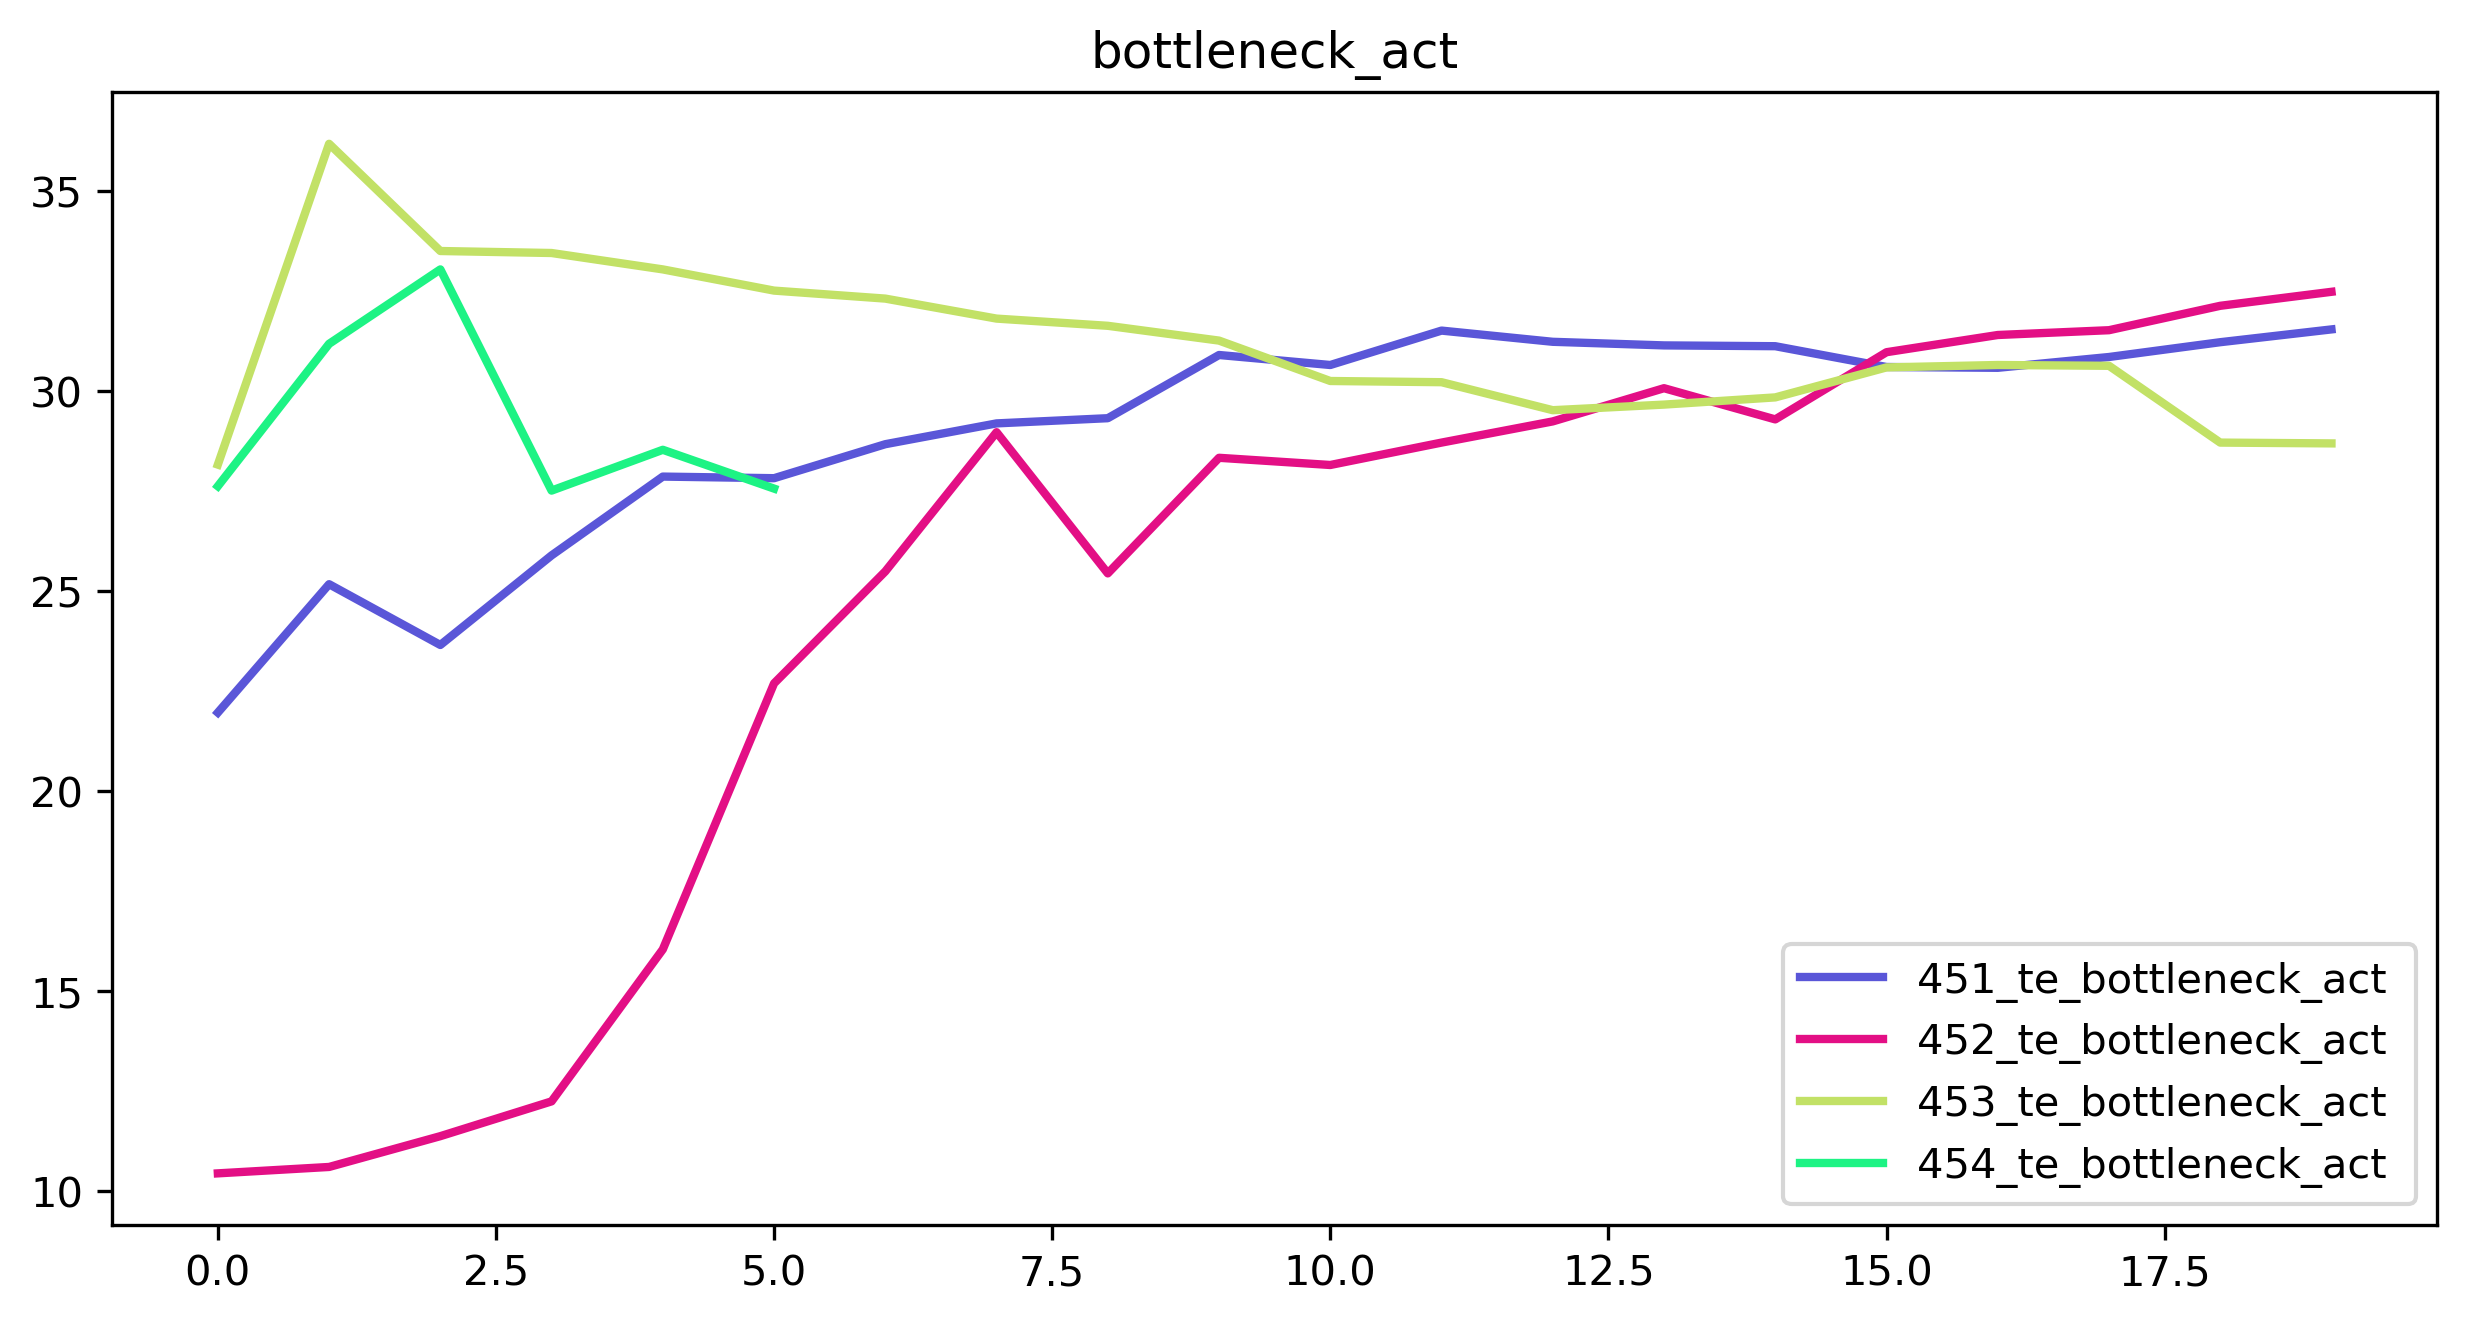

In [4]:
vu.plot_cf_compare(cf_int_arr=cf_int_arr, 
                   data_log_keys = ['te'], loss_key='bottleneck_act', 
                   max_act_ep=max_act_ep, legend_loc='lower right',
                   experiments_folder=experiments_folder,
                   exp_base_name=exp_base_name, ae_f_name_base=ae_f_name_base)

451 ,  tr_te  - log is loaded with len:  20
451_tr_te_bottleneck_act  [28.74, 27.593333333333334, 27.428333333333335] 
max(30.39),min(22.65)
452 ,  tr_te  - log is loaded with len:  20
452_tr_te_bottleneck_act  [34.865, 35.185, 34.791666666666664] 
max(36.07),min(10.23)
453 ,  tr_te  - log is loaded with len:  20
453_tr_te_bottleneck_act  [31.44333333333333, 31.305, 30.171666666666667] 
max(35.72),min(20.03)
454 ,  tr_te  - log is loaded with len:  6
454_tr_te_bottleneck_act  [26.906666666666666, 31.585, 32.24666666666667] 
max(32.25),min(24.81)


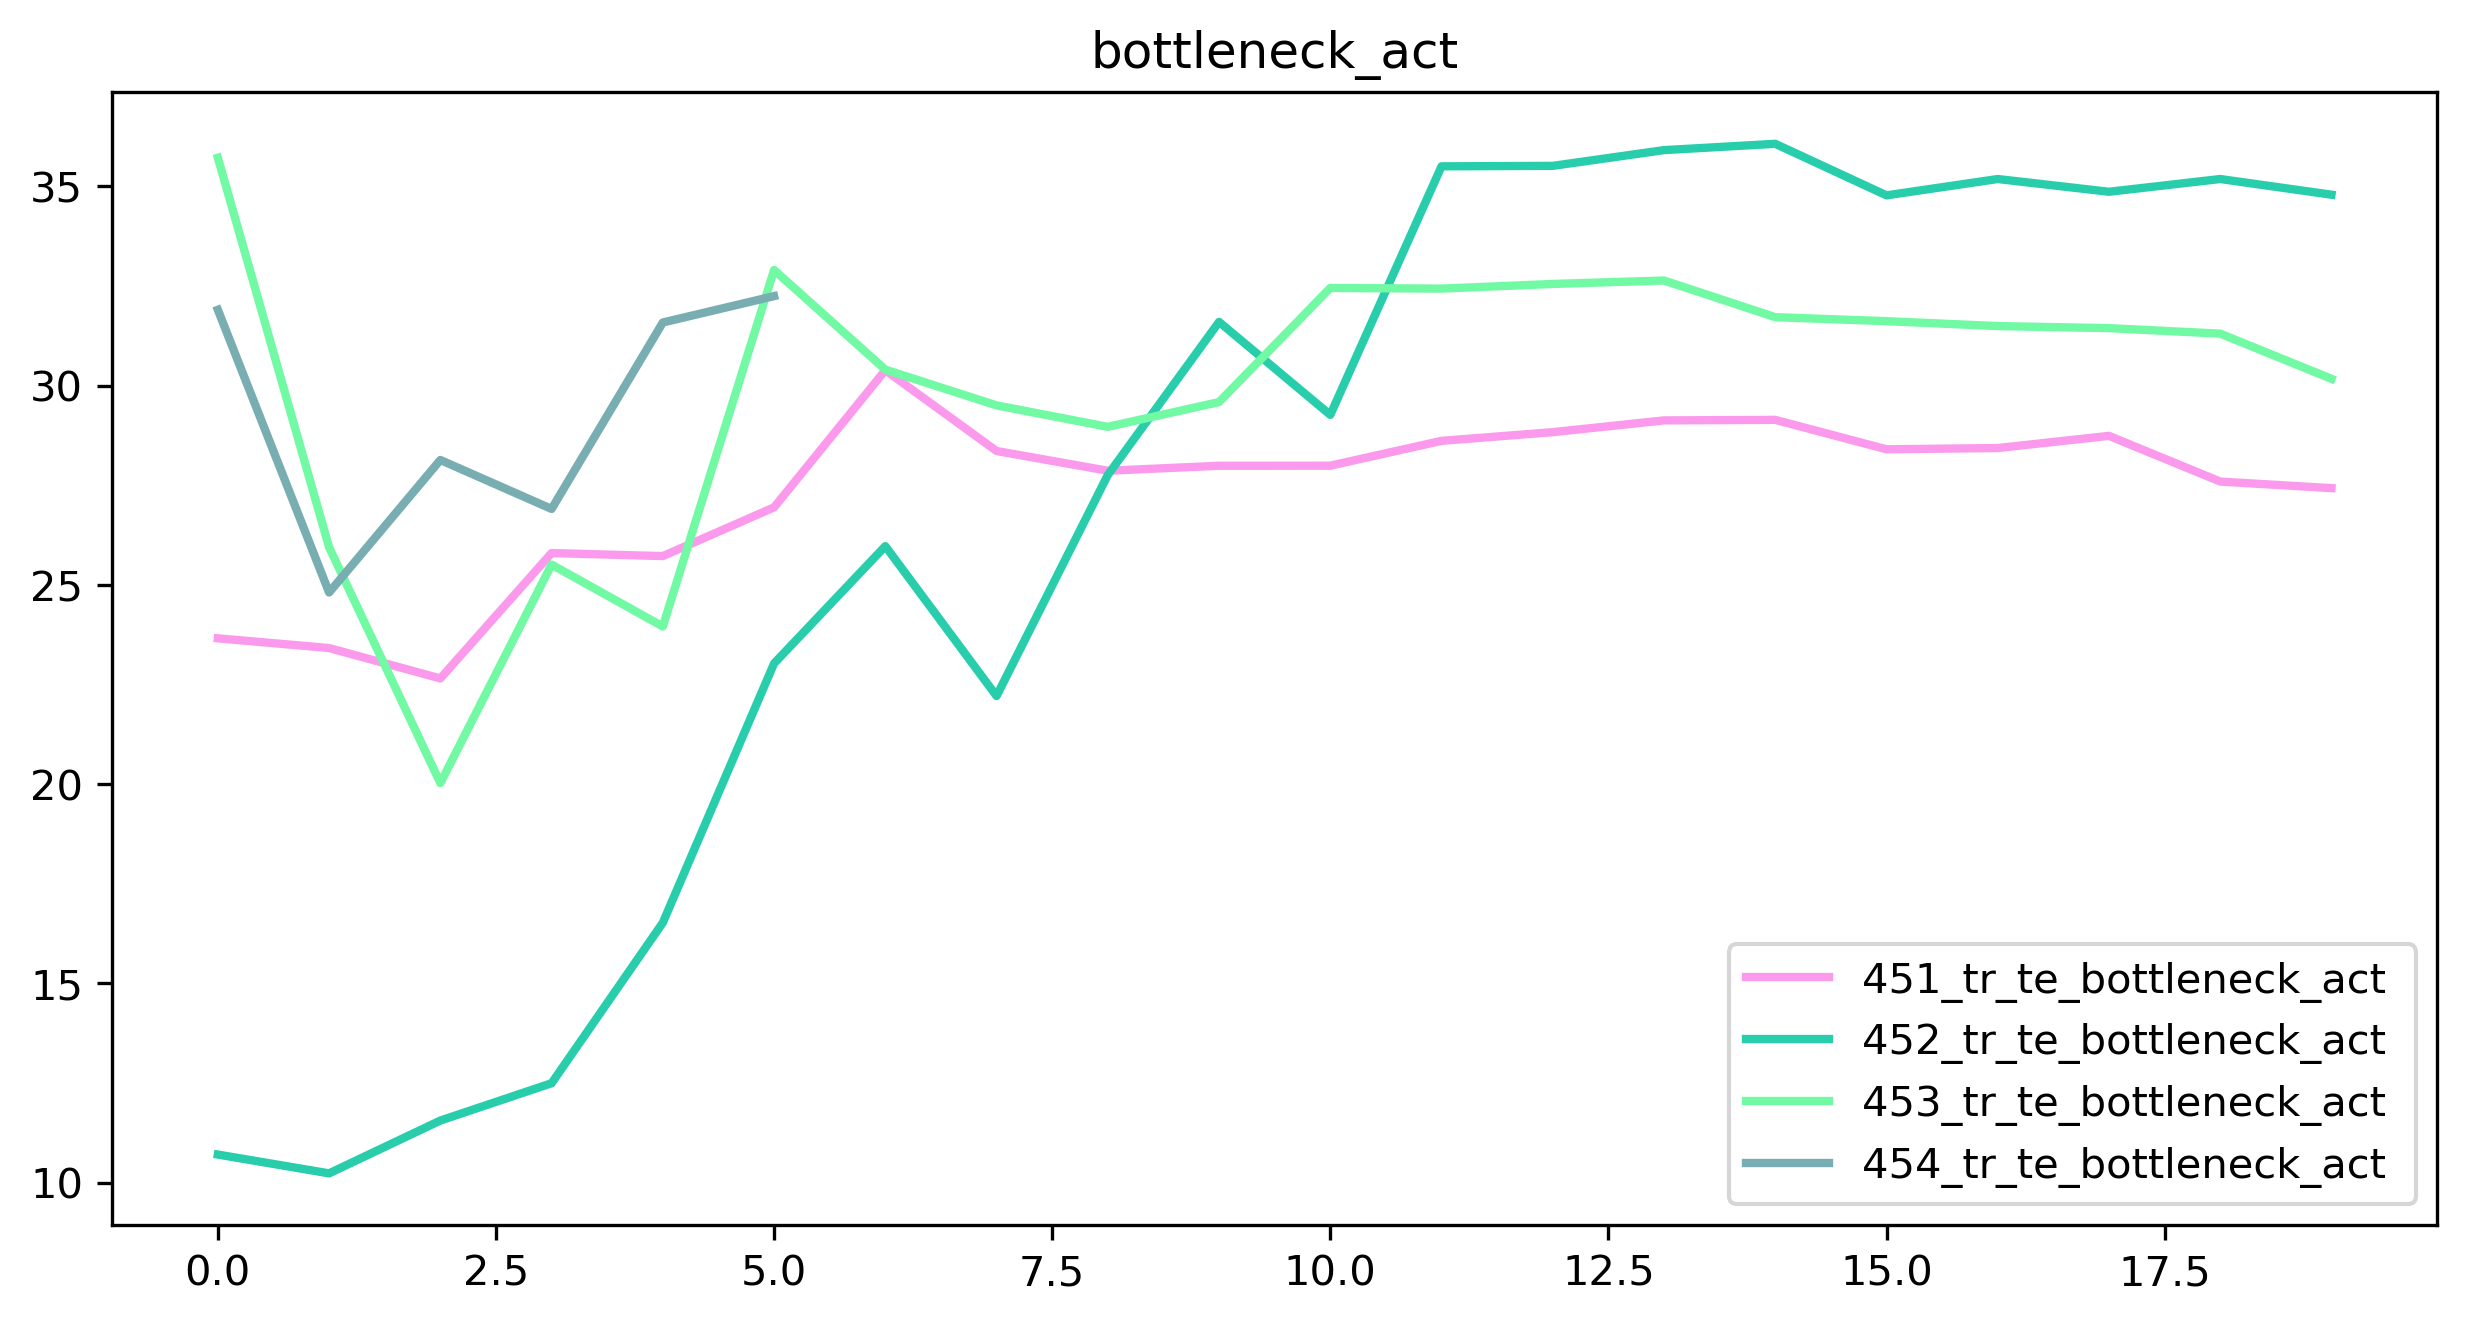

In [5]:
vu.plot_cf_compare(cf_int_arr=cf_int_arr, 
                   data_log_keys = ['tr_te'], loss_key='bottleneck_act', 
                   max_act_ep=max_act_ep, legend_loc='lower right',
                   experiments_folder=experiments_folder,
                   exp_base_name=exp_base_name, ae_f_name_base=ae_f_name_base)

451 ,  te  - log is loaded with len:  20
451_te_bottleneck_kmeans  [62.18, 64.38, 63.09] 
max(65.30),min(55.82)
452 ,  te  - log is loaded with len:  20
452_te_bottleneck_kmeans  [51.43, 52.68, 51.49] 
max(55.80),min(37.86)
453 ,  te  - log is loaded with len:  20
453_te_bottleneck_kmeans  [53.22, 55.72, 57.26] 
max(61.23),min(53.22)
454 ,  te  - log is loaded with len:  6
454_te_bottleneck_kmeans  [66.59, 66.7, 65.91] 
max(66.70),min(63.06)


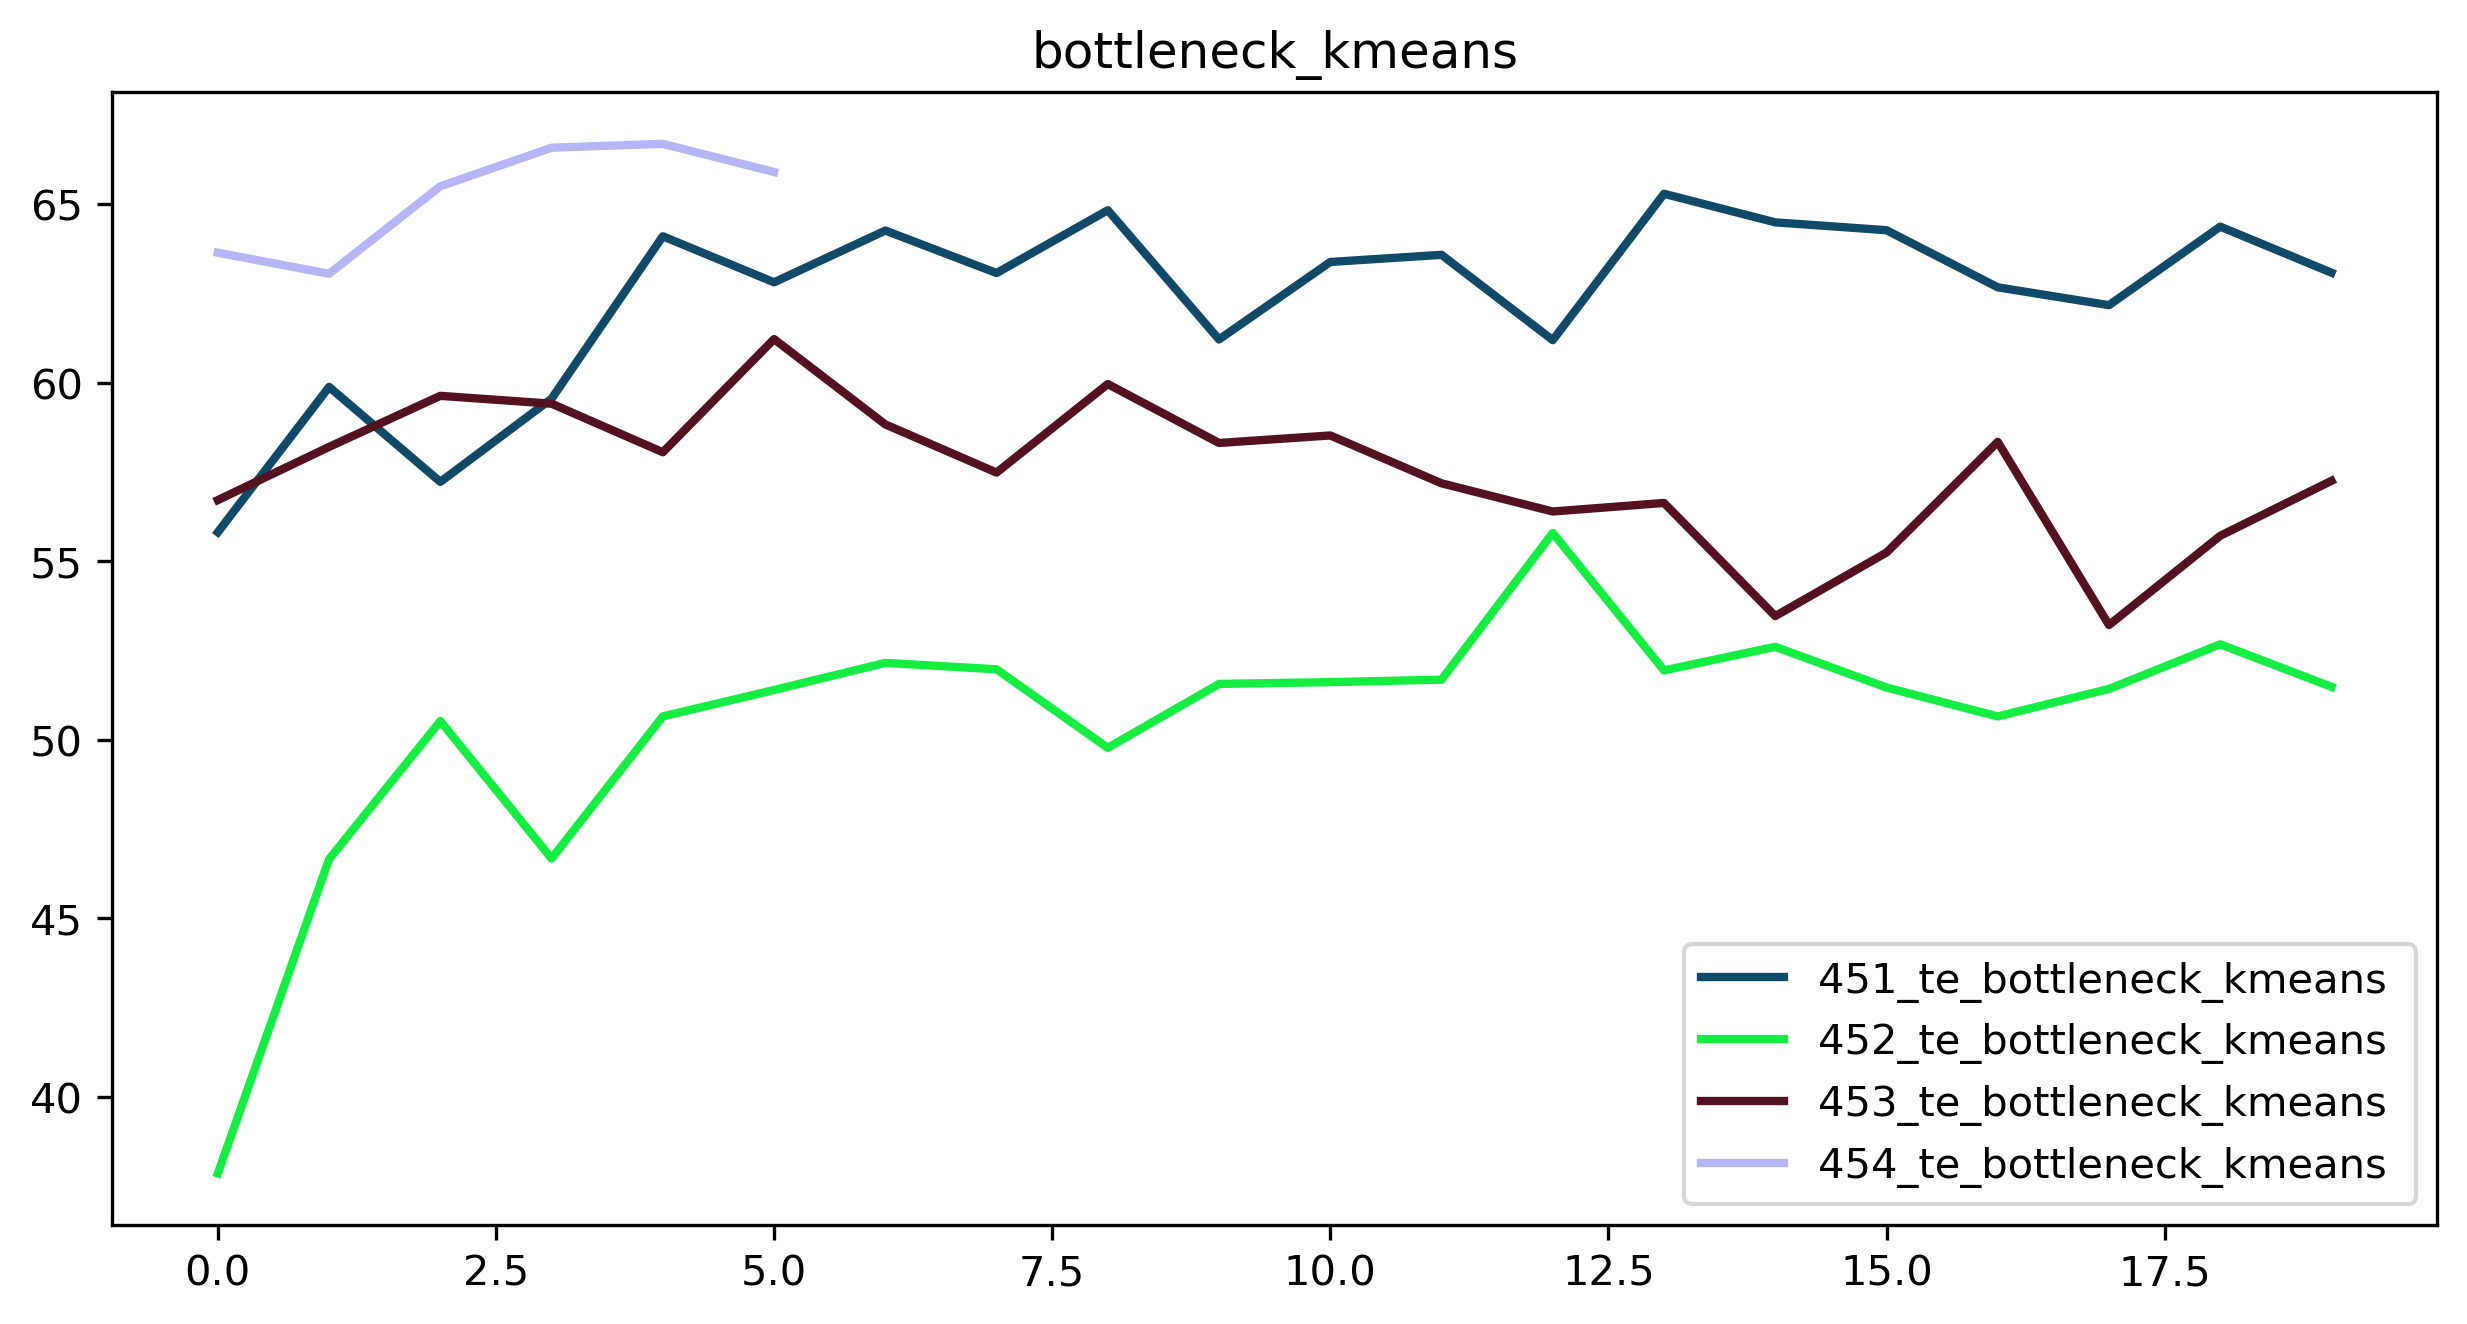

In [6]:
vu.plot_cf_compare(cf_int_arr=cf_int_arr, 
                   data_log_keys = ['te'], loss_key='bottleneck_kmeans', 
                   max_act_ep=max_act_ep, legend_loc='lower right',
                   experiments_folder=experiments_folder,
                   exp_base_name=exp_base_name, ae_f_name_base=ae_f_name_base)

451 ,  tr_te  - log is loaded with len:  20
451_tr_te_sparsity  [310.3483125742059, 303.3012773958035, 296.98160114639904] 
max(595.36),min(0.00)
452 ,  tr_te  - log is loaded with len:  20
453 ,  tr_te  - log is loaded with len:  20
454 ,  tr_te  - log is loaded with len:  6
454_tr_te_sparsity  [806.0951833904255, 744.1691526037175, 719.6790023881476] 
max(846.27),min(0.00)


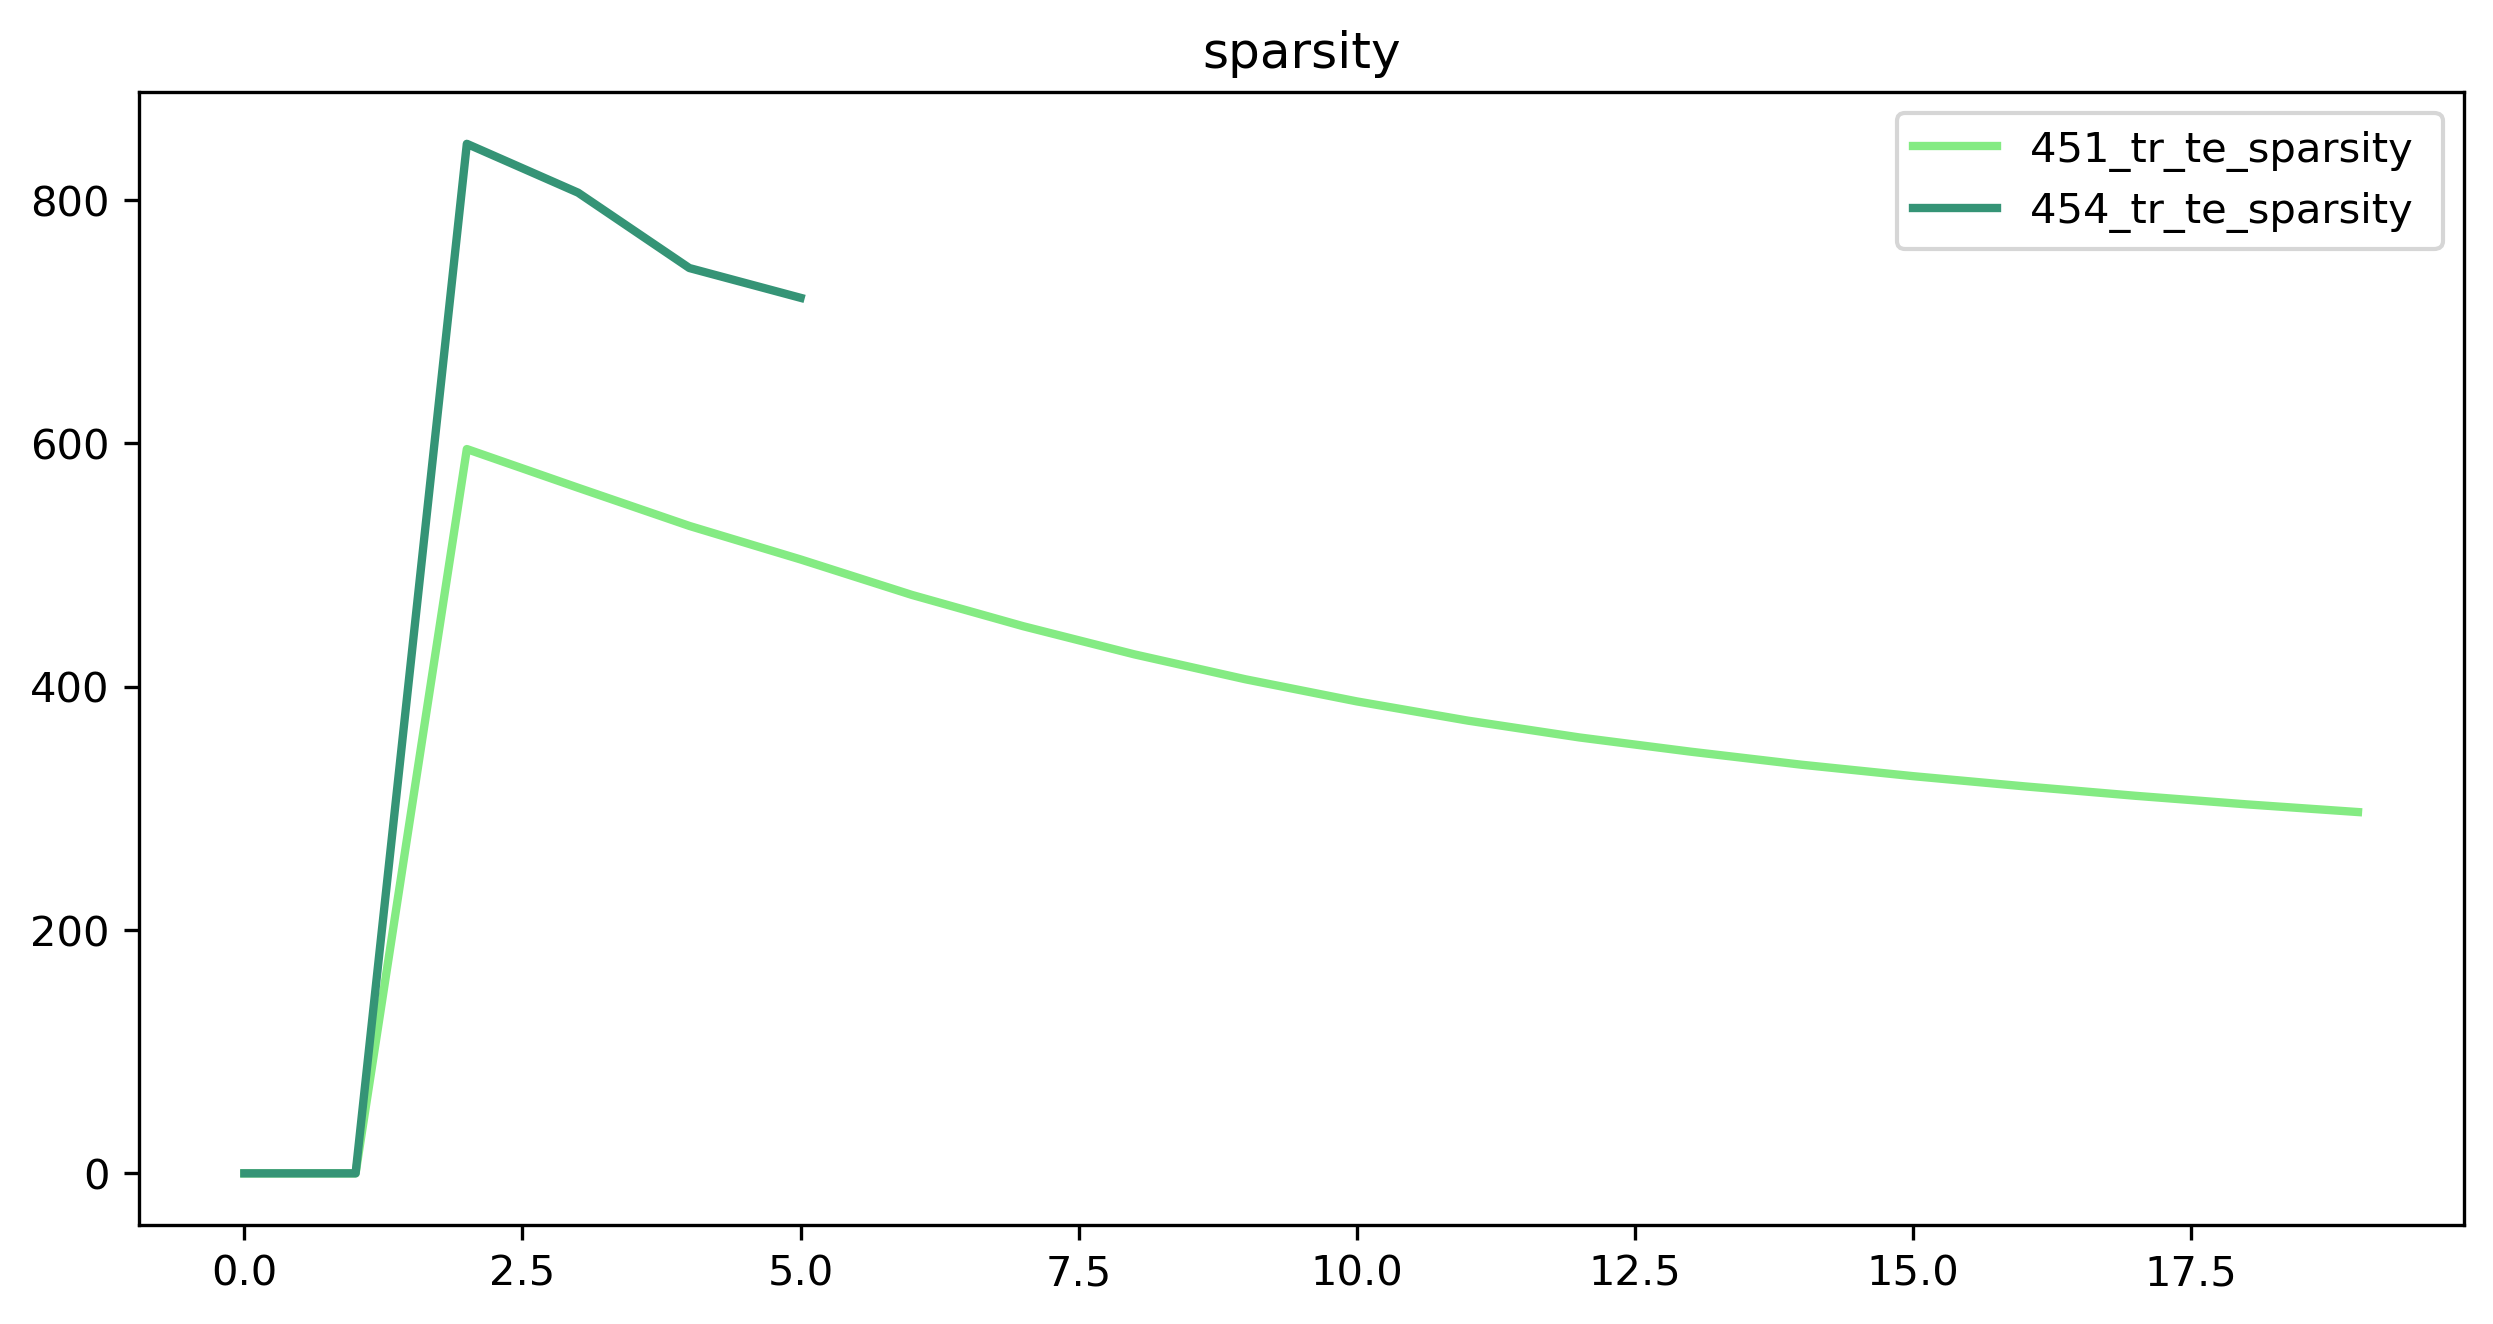

In [7]:
import importlib as impL
impL.reload(vu)
#cf_int_arr=np.array([451])
mul_before_plot=[1,1,1]
vu.plot_cf_compare(cf_int_arr=cf_int_arr, mul_before_plot=mul_before_plot,
                   data_log_keys = ['tr_te'], loss_key='sparsity', 
                   max_act_ep=max_act_ep, legend_loc='upper right',
                   experiments_folder=experiments_folder,
                   exp_base_name=exp_base_name, ae_f_name_base=ae_f_name_base)

451 ,  tr_te  - log is loaded with len:  20
451_tr_te_reconstruction*8.0 [47.526922116056085, 47.298164097592235, 47.08931552991271] 
max(80.12),min(47.09)
452 ,  tr_te  - log is loaded with len:  20
452_tr_te_reconstruction*4.0 [79.89892061427236, 79.4932207390666, 78.83839374035597] 
max(127.26),min(78.84)
453 ,  tr_te  - log is loaded with len:  20
453_tr_te_reconstruction  [532.6508787423372, 531.5129026919603, 530.5092448443174] 
max(643.47),min(530.51)
454 ,  tr_te  - log is loaded with len:  6
454_tr_te_reconstruction  [521.3832186311483, 519.425256729126, 517.881844997406] 
max(543.62),min(517.88)


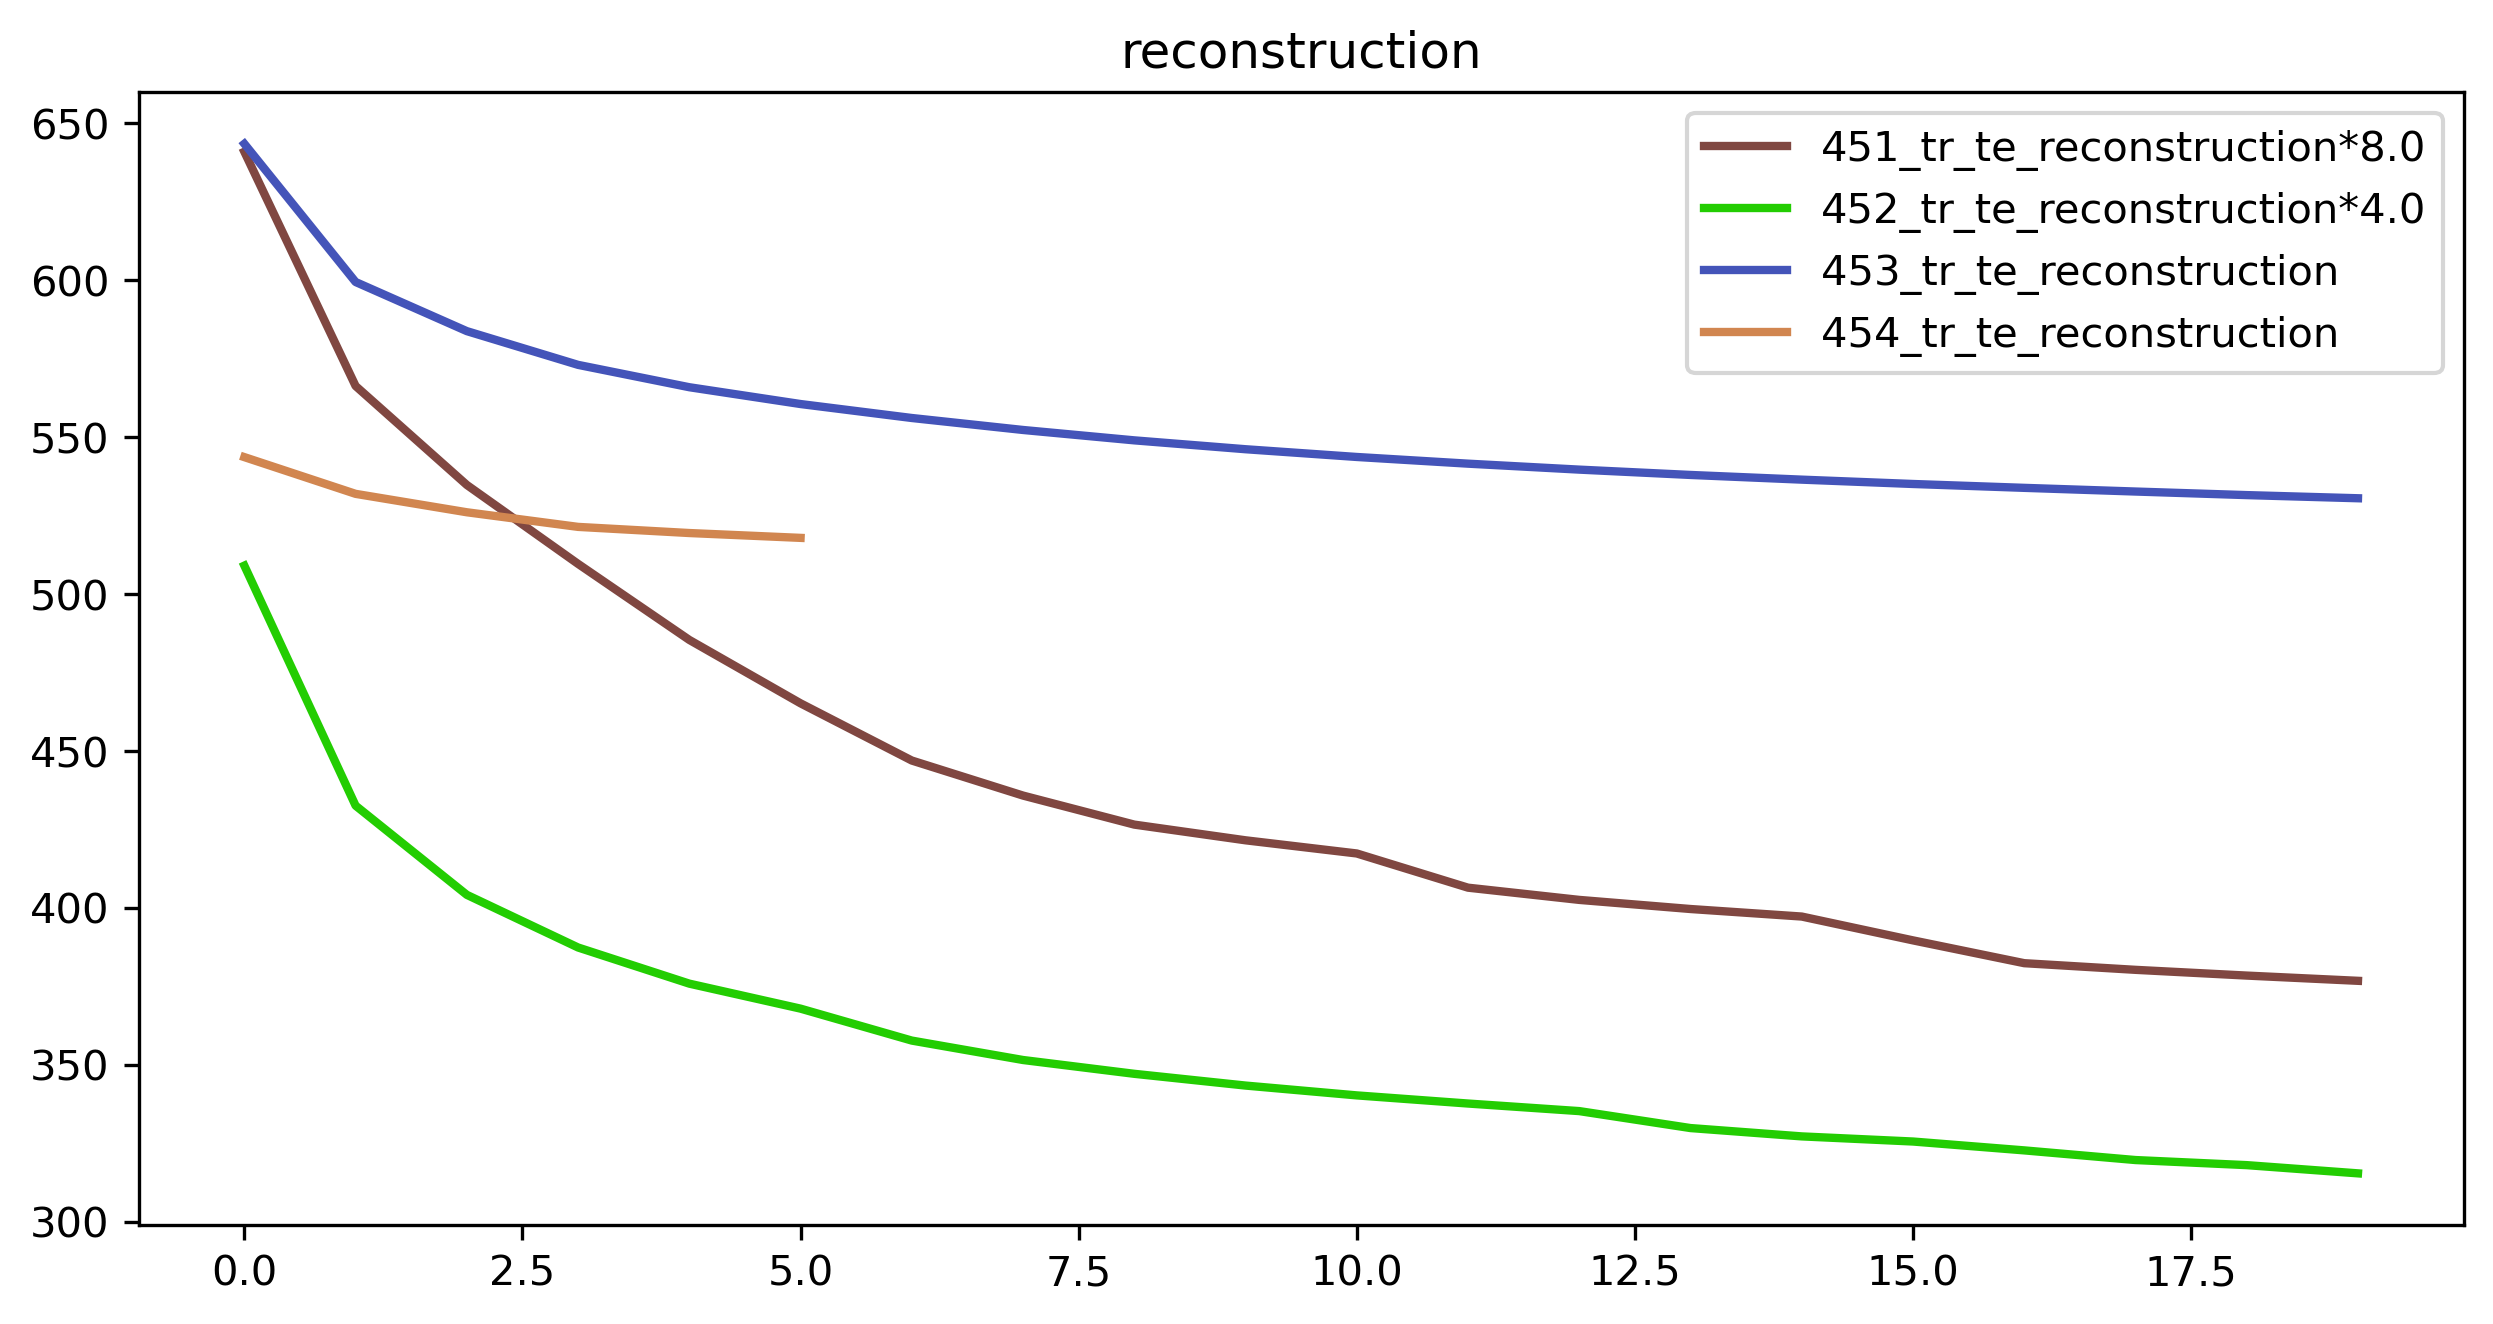

In [8]:
import importlib as impL
impL.reload(vu)
#cf_int_arr=np.array([451,452,453])
mul_before_plot= np.array([8, 4, 1, 1]) # np.ones(cf_int_arr.shape, dtype=int)
vu.plot_cf_compare(cf_int_arr=cf_int_arr, mul_before_plot=mul_before_plot,
                   data_log_keys = ['tr_te'], loss_key='reconstruction', 
                   max_act_ep=None, legend_loc='upper right',
                   experiments_folder=experiments_folder,
                   exp_base_name=exp_base_name, ae_f_name_base=ae_f_name_base)

tr_te  - log is loaded with len:  20
te  - log is loaded with len:  20
skipping -  valid loss
skipping -  reconstruction
skipping -  bottleneck_kmeans
bottleneck_act :
19 5 [13 14 15 16 17]
0*/mnt/SSD_Data/vaesae_experiments/FM/exp_conv_ae_simple_is28_cf452/btl_013_tr_va_.png*
0*/mnt/SSD_Data/vaesae_experiments/FM/exp_conv_ae_simple_is28_cf452/btl_013_tr_te_.png*
1*/mnt/SSD_Data/vaesae_experiments/FM/exp_conv_ae_simple_is28_cf452/btl_014_tr_va_.png*
1*/mnt/SSD_Data/vaesae_experiments/FM/exp_conv_ae_simple_is28_cf452/btl_014_tr_te_.png*
2*/mnt/SSD_Data/vaesae_experiments/FM/exp_conv_ae_simple_is28_cf452/btl_015_tr_va_.png*
2*/mnt/SSD_Data/vaesae_experiments/FM/exp_conv_ae_simple_is28_cf452/btl_015_tr_te_.png*
3*/mnt/SSD_Data/vaesae_experiments/FM/exp_conv_ae_simple_is28_cf452/btl_016_tr_va_.png*
3*/mnt/SSD_Data/vaesae_experiments/FM/exp_conv_ae_simple_is28_cf452/btl_016_tr_te_.png*
4*/mnt/SSD_Data/vaesae_experiments/FM/exp_conv_ae_simple_is28_cf452/btl_017_tr_va_.png*
4*/mnt/SSD_Data/va

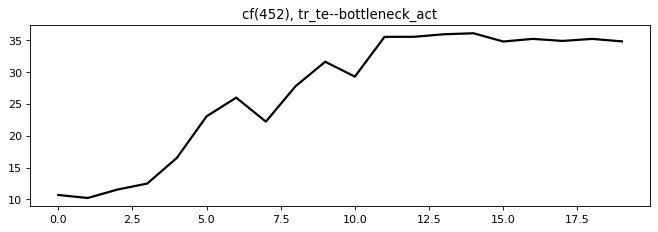

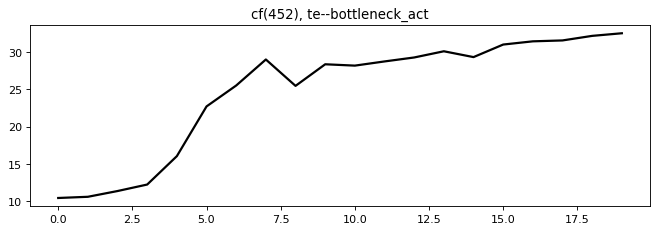

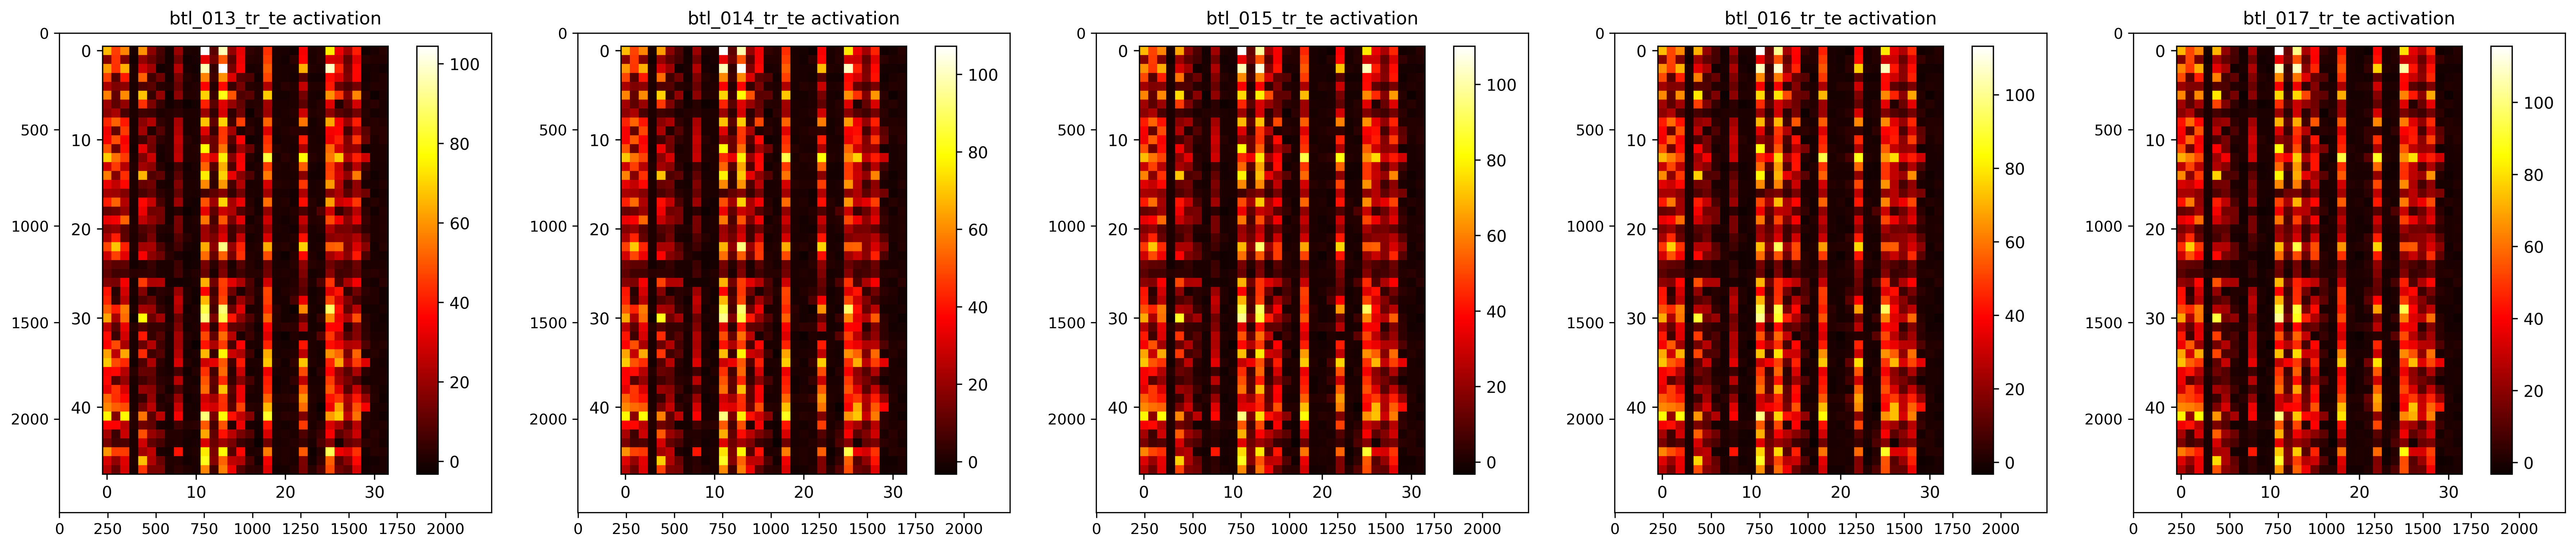

In [9]:
import importlib as impL
impL.reload(vu)
vu.plot_cf(cf_int=452, data_log_keys = ['tr_te','te'], k_loss_disp_list=['sparsity','bottleneck_act'], 
           max_act_ep=None,select_id_type='last',
           plot_cnt = 5,                   
           experiments_folder=experiments_folder,
           exp_base_name=exp_base_name, ae_f_name_base=ae_f_name_base)

tr_te  - log is loaded with len:  6
te  - log is loaded with len:  6
skipping -  valid loss
skipping -  reconstruction
sparsity :
skipping -  bottleneck_kmeans
bottleneck_act :
5 4 [1 2 3]
0*/mnt/SSD_Data/vaesae_experiments/FM/exp_conv_ae_simple_is28_cf454/btl_001_tr_va_.png*
0*/mnt/SSD_Data/vaesae_experiments/FM/exp_conv_ae_simple_is28_cf454/btl_001_tr_te_.png*
1*/mnt/SSD_Data/vaesae_experiments/FM/exp_conv_ae_simple_is28_cf454/btl_002_tr_va_.png*
1*/mnt/SSD_Data/vaesae_experiments/FM/exp_conv_ae_simple_is28_cf454/btl_002_tr_te_.png*
2*/mnt/SSD_Data/vaesae_experiments/FM/exp_conv_ae_simple_is28_cf454/btl_003_tr_va_.png*
2*/mnt/SSD_Data/vaesae_experiments/FM/exp_conv_ae_simple_is28_cf454/btl_003_tr_te_.png*


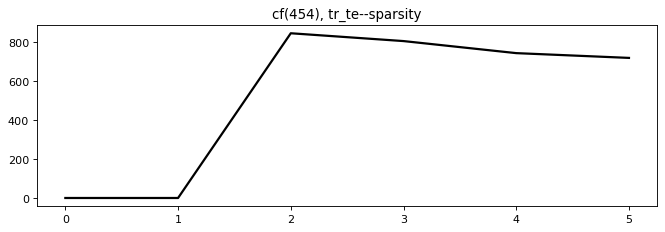

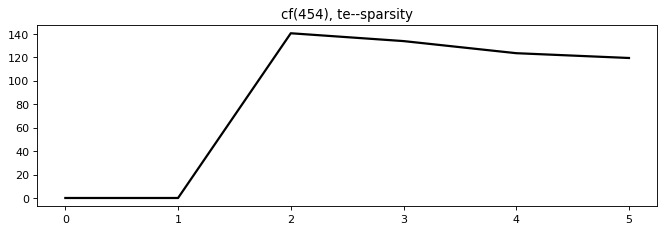

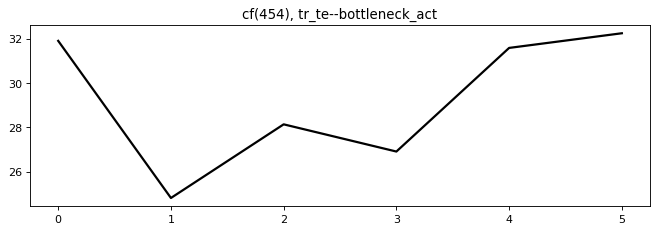

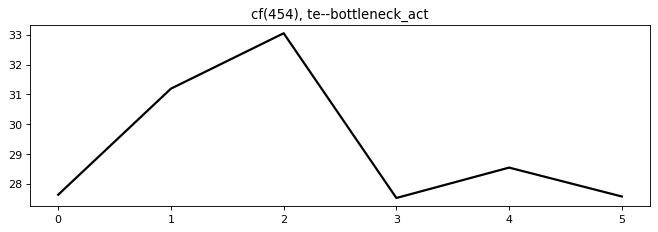

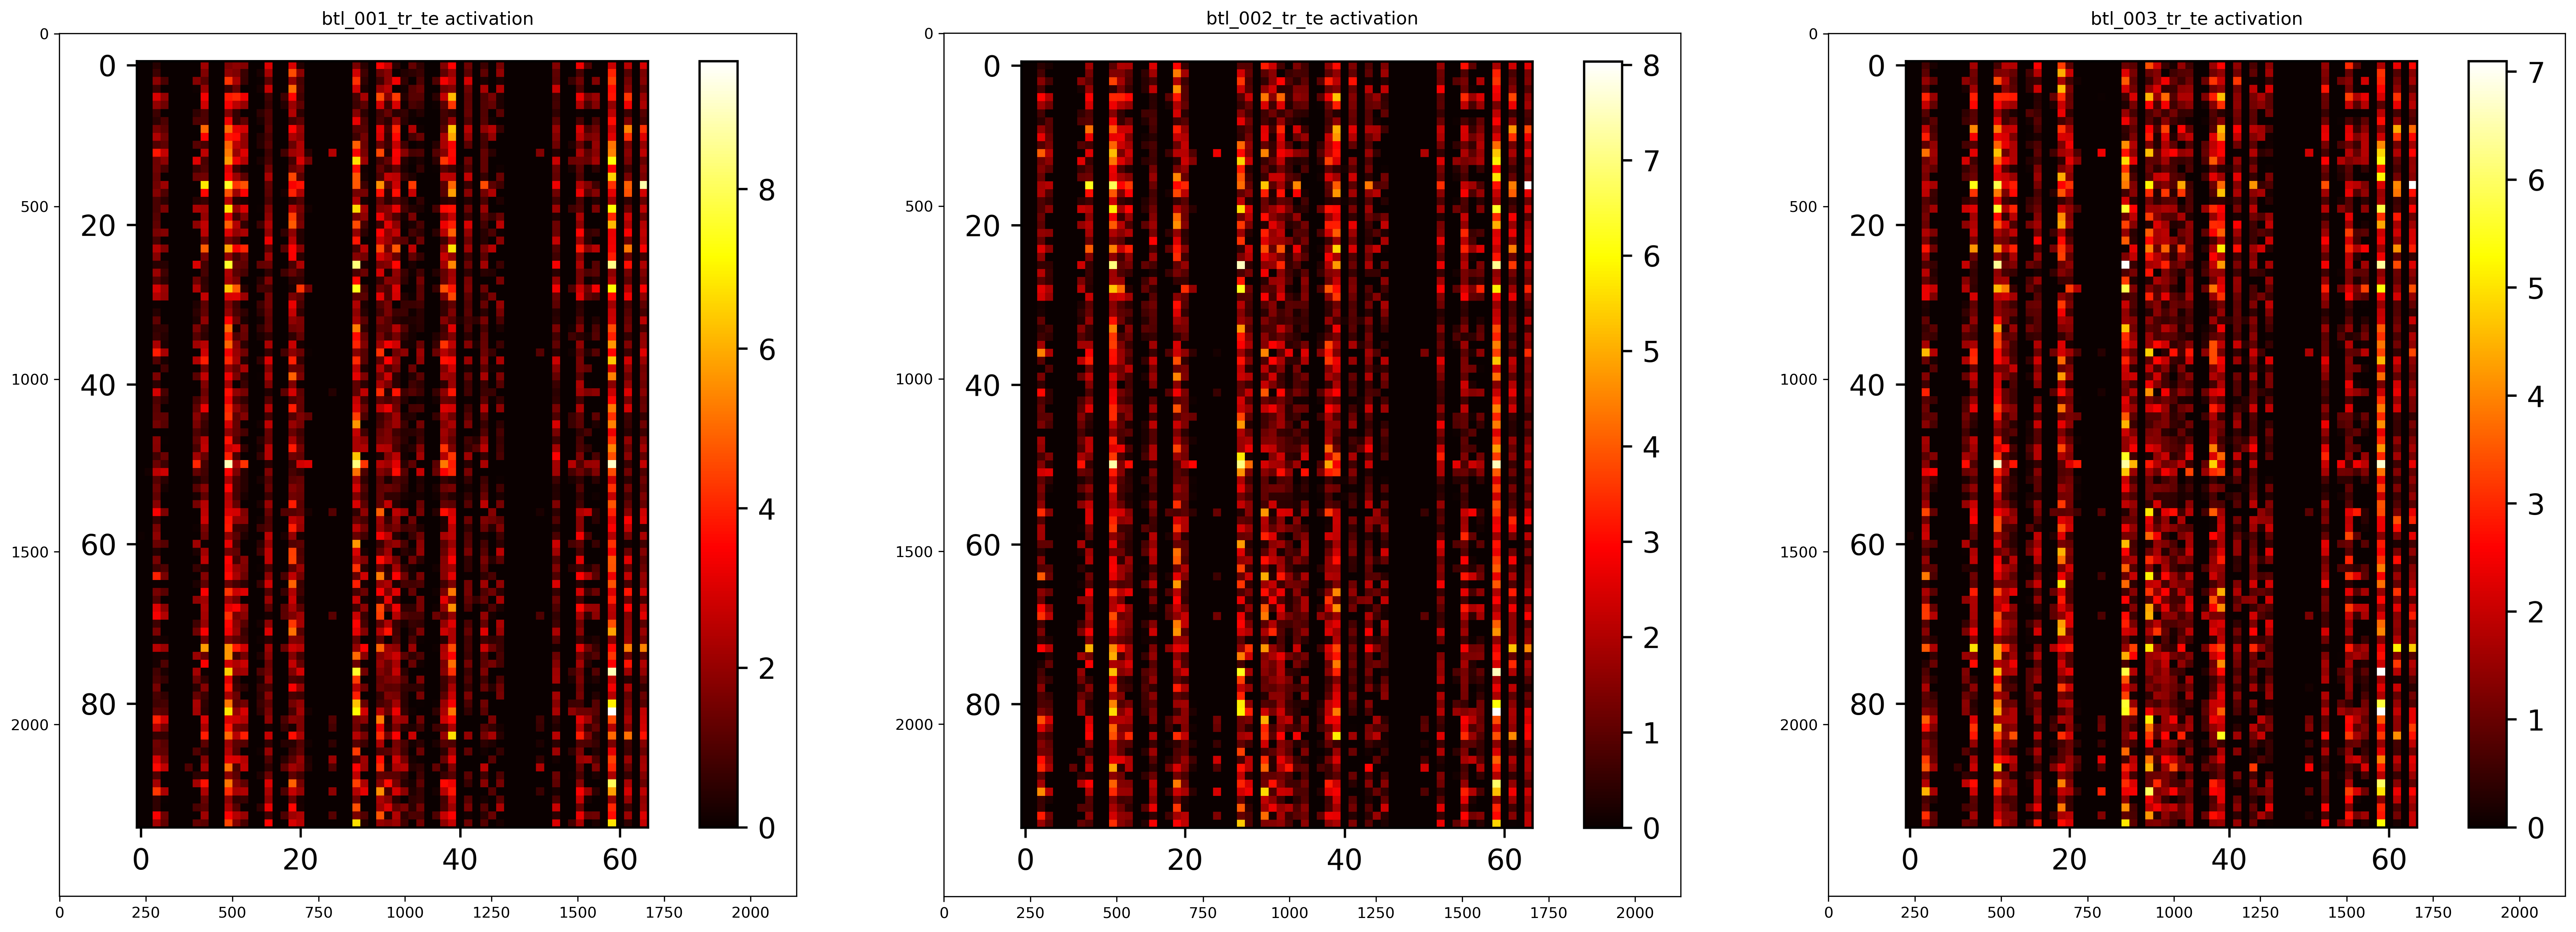

In [10]:
import importlib as impL
impL.reload(vu)
vu.plot_cf(cf_int=454, data_log_keys = ['tr_te','te'], k_loss_disp_list=['sparsity','bottleneck_act'], 
           max_act_ep=None,select_id_type='last',
           plot_cnt = 4,                   
           experiments_folder=experiments_folder,
           exp_base_name=exp_base_name, ae_f_name_base=ae_f_name_base)